----------------------------

In [2]:
from image_loader import LoadImage
from image_preprocesser import PreprocessImage

### **Loading and Plotting Images**

No label path provided, skipping label loading.


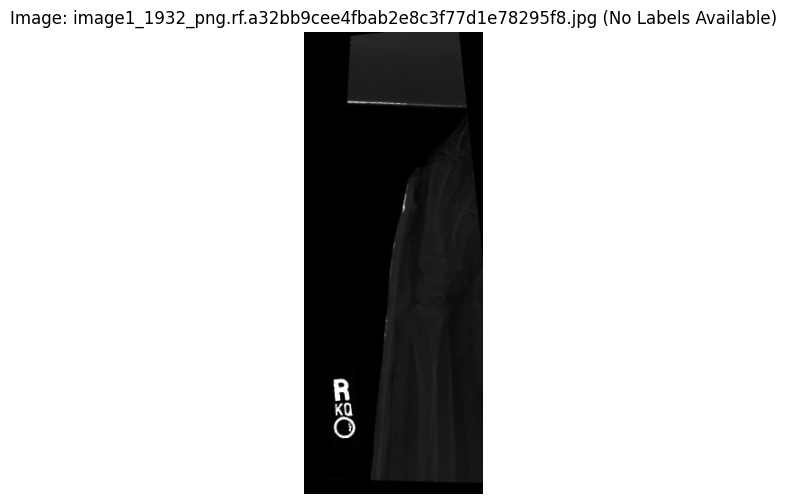

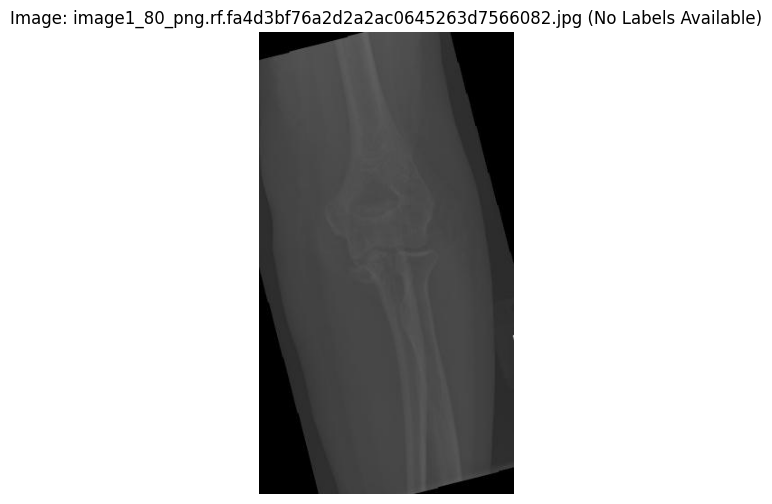

In [3]:
fractures_images_path = "../1-Data/ml-dp/fracture"

loader = LoadImage(fractures_images_path)
images, names = loader.load_images_opencv()

loader.plot_images_with_bboxes()

loader = LoadImage(image_path='/ruta/a/imagenes', label_path='/ruta/a/labels')

### **Preprocessing images**

In [ ]:
preprocessor = PreprocessImage(images)
resized_images, _ = preprocessor.resize_images_and_labels() #_ indicates that we don't have labels

resized_preprocessor = PreprocessImage(resized_images)
gray_images = resized_preprocessor.convert_to_grayscale()

normalized_preprocessor = PreprocessImage(gray_images)
normalized_images = normalized_preprocessor.normalize_images()


preprocessor = PreprocessImage(images, labels)
resized_images, labels = preprocessor.resize_images_and_labels()